## **Lingerie Shopping Brand Analysis**

**Big Data - First Exam** - Code by Fernando Quintero and Juan Peña.  10/mar/2022

In this work we perform a brand analysis, and developed an analysis on the fashion trend of underwear and swimwear products. Datasets were created by extracting data from popular retail sites via PromptCloud data extraction solutions. Sites covered are; Amazon, Victoria's Secret, Btemptd, Calvin Klein, Hanky Panky, American Eagle, Macy's, Nordstrom, Topshop USA. Finally, we perform a predictive analysis taking into account the algorithms seen in class.

#### **Table of Contents**
1.   [Import libraries](#implibraries)
2.   [Read dataset](#readdata)
3.   [Data Cleaning](#dataclean)
4.   [Filter profiles](#filer)
5.   [Compute roughness parameters](#compute)
6.   [Roughness parameters for whole image](#whole)

### 1. Import libraries <a name="implibraries"></a>
- In this section we import all the libraries needed for the analysis, the most important ones are `pandas` for descriptive and predictive data analysis, and `seaborn` for making cool plots. In addition, we import a `pip` library called `fuzzywuzzy` to find some repeated names in the brand names. 

In [87]:
pip install fuzzywuzzy

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [81]:
import numpy
import os
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns

# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
    
def replace_names_in_column(df, column, string_to_match, min_ratio, string_to_replace):
    # get a list of unique strings
    strings = df[column].unique()
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)
    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_replace
    # let us know the function's done
    print("All done!")

### 2. Read dataset <a name="readdata"></a>

- We use the function `pd.read_csv` to read every inner wear data from the popular retail sites via PromptCloud's. The `PATH` folder contains the path where all the datasets are located.

In [82]:
PATH = '../Data/datasets_parcial/'
file_amazon = PATH + 'amazon_com.csv'
file_btemptd = PATH + 'btemptd_com.csv'
file_calvinklein = PATH + 'calvinklein_com.csv'
file_hankypanky = PATH + 'hankypanky_com.csv'
file_macys = PATH + 'macys_com.csv'
file_shop_nordstrom = PATH + 'shop_nordstrom_com.csv'
file_us_topshop = PATH + 'us_topshop_com.csv'
file_victoriassecret = PATH + 'victoriassecret_com.csv'
file_ae = PATH + 'ae_com.csv'

data_amazon = pd.read_csv(file_amazon, sep=',', header= 0)
data_btempt = pd.read_csv(file_btemptd, sep=',', header= 0)
data_calvinklein = pd.read_csv(file_calvinklein, sep=',', header= 0)
data_hankypanky = pd.read_csv(file_hankypanky, sep=',', header= 0)
data_macys = pd.read_csv(file_macys, sep=',', header= 0)
data_shop_nordstrom = pd.read_csv(file_shop_nordstrom, sep=',', header= 0)
data_us_topsho = pd.read_csv(file_us_topshop, sep=',', header= 0)
data_ae = pd.read_csv(file_ae, sep=',', header= 0)
data_victoriassecret = pd.read_csv(file_victoriassecret, sep=',', header= 0)

- We then concatenate each Dataframe with the function `pd.concat`.

In [83]:
data = pd.concat([data_amazon, data_btempt, data_calvinklein, data_hankypanky, data_macys, data_shop_nordstrom, data_us_topsho, data_victoriassecret, data_ae], ignore_index = True)
print(data.shape)

(613143, 14)


- We show the first 3 rows of the dataset to check that everything is OK.

In [114]:
data.head(3)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,Calvin Klein Women's Sheer Marquisette Demi Un...,36.0,32.4,https://www.amazon.com/-/dp/B01NAVD98J?th=1&psc=1,calvin klein,Bras,Amazon US,"An unlined demi cup bra featuring sheer, sexy ...",4.5,47.0,"[ 72% Nylon, 28% Elastane , Imported , hook an...","30B , 30C , 30D , 30DD , 32A , 32B , 32C , 32D...","30B , 30C , 30D , 30DD , 32B , 32C , 32D , 32D...",Bare
1,Wacoal Embrace Lace Bikini Panty,27.0,27.0,https://www.amazon.com/-/dp/B0011YQFNK?th=1&psc=1,wacoal,Panties,Amazon US,Embrace lace bikini offers great fit and match...,4.4,91.0,"[ 100% Nylon , Imported , Hand Wash , 1.2"" hig...","Small , Medium , Large , X-Large","Small , Medium , X-Large",Large
2,Wacoal Women's Slimline Seamless Minimizer Bra,65.0,65.0,https://www.amazon.com/-/dp/B000T3606Q?th=1&psc=1,wacoal,Bras,Amazon US,Seamless underwire minimizer bra gives great s...,4.3,298.0,"[ Cups: 100% Polyester; Back: 71% Nylon, 29% S...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...",Black


### 3. Data Cleaning <a name="dataclean"></a>

- First, we visualize through a bar chart the different Brand Names in the dataset and we find that there are several repeated brands with different names, as is the case of Calvin Klein where we have 4 different categories because their names change in capital letters, spaces, dashes, etc. In addition, there are several brands with errors in the names. 

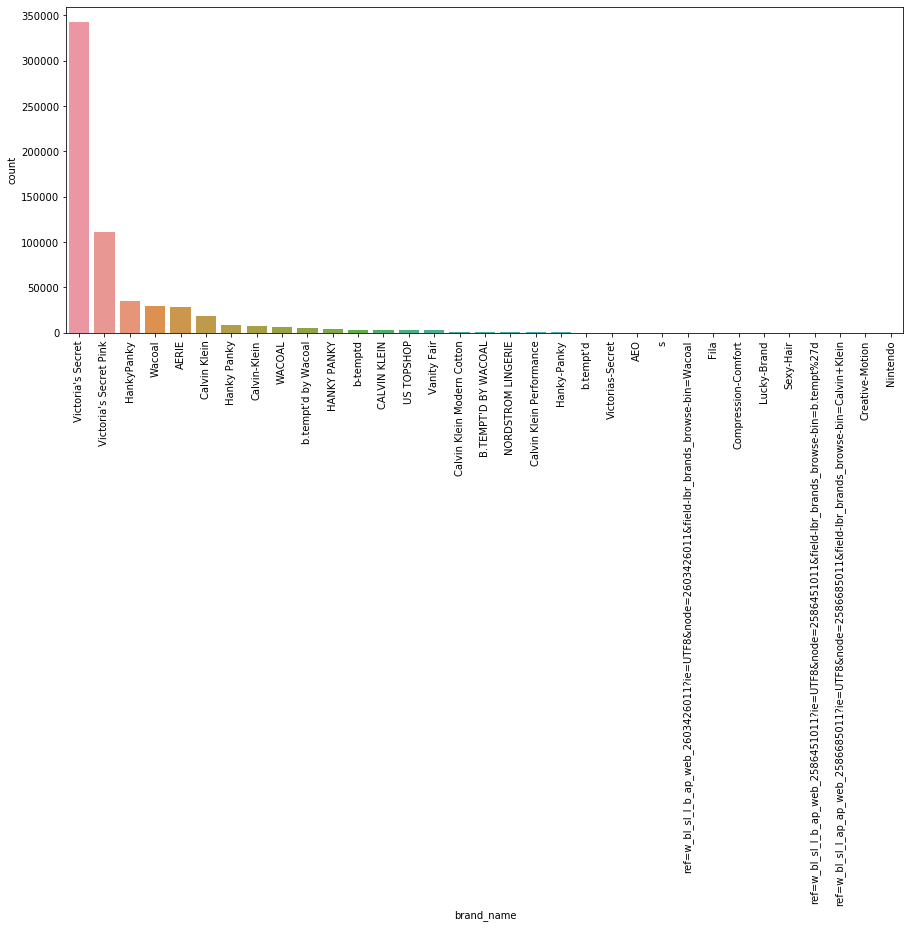

In [84]:
data['brand_name'] = data['brand_name'].fillna('None')
plt.figure(figsize=(15, 6))
sns.countplot(data=data, x='brand_name', order = data['brand_name'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

- We can also use a `unique()` of `bands` to display the categories of the Brand Names.

In [87]:
brand_names = data['brand_name'].unique()
print(brand_names)

['Calvin-Klein' 'Wacoal' 'Hanky-Panky' 'b-temptd' 'Victorias-Secret'
 'WACOAL' 'Calvin Klein' 'HankyPanky' 'Hanky Panky' "b.tempt'd by Wacoal"
 'Calvin Klein Modern Cotton' 'Vanity Fair' 'Calvin Klein Performance'
 "b.tempt'd" 'HANKY PANKY' "B.TEMPT'D BY WACOAL" 'CALVIN KLEIN'
 'NORDSTROM LINGERIE' 'US TOPSHOP' "Victoria's Secret"
 "Victoria's Secret Pink" 'AERIE']


- To solve this, we implement the `replace_names_in_column()` function defined at the beginning of this Notebook, which uses the `fuzzywuzzy` library to replace the repeated tag categories based on the similarity ratio between them. We then plot the bar chart again and we can see that we now have fewer brand names.

All done!
All done!
All done!
All done!
All done!
All done!
All done!


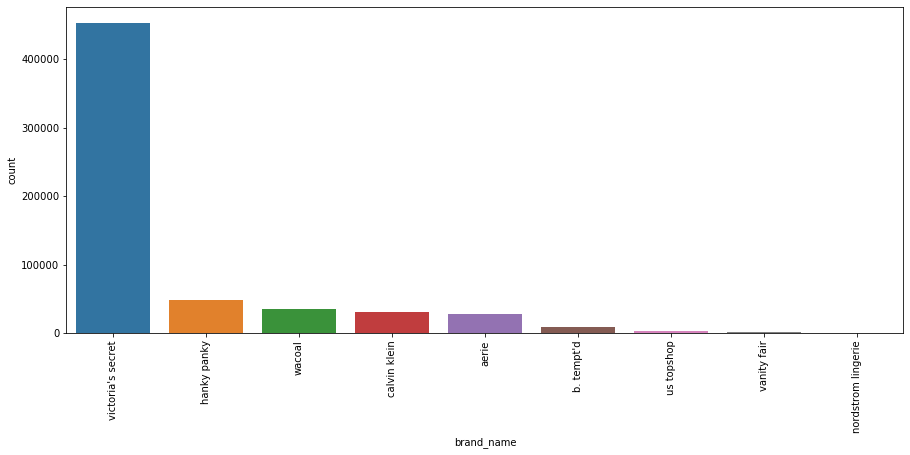

In [88]:
# convert to lower case
data['brand_name'] = data['brand_name'].str.lower()
# remove trailing white spaces
data['brand_name'] = data['brand_name'].str.strip()

# use the function we just wrote to replace close matches to "d.i khan" with "d.i khan"
replace_names_in_column(df = data, column='brand_name', string_to_match = "calvin klein", min_ratio = 60, string_to_replace = "calvin klein")
replace_names_in_column(df = data, column='brand_name', string_to_match = "hanky panky", min_ratio = 80, string_to_replace = "hanky panky")
replace_names_in_column(df = data, column='brand_name', string_to_match = "b. tempt'd", min_ratio = 60, string_to_replace = "b. tempt'd")
replace_names_in_column(df = data, column='brand_name', string_to_match = "field-lbr_brands_browse-bin=calvin+klein", min_ratio = 50, string_to_replace = "calvin klein")
replace_names_in_column(df = data, column='brand_name', string_to_match = "brands_browse-bin=b.tempt%27d", min_ratio = 40, string_to_replace = "b. tempt'd")
replace_names_in_column(df = data, column='brand_name', string_to_match = "brands_browse-bin=wacoal", min_ratio = 40, string_to_replace = "wacoal")
replace_names_in_column(df = data, column='brand_name', string_to_match = "victoria's secret", min_ratio = 80, string_to_replace = "victoria's secret")

brand_names = data['brand_name'].unique()
plt.figure(figsize=(15, 6))
sns.countplot(data=data, x='brand_name', order = data['brand_name'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

- However, we can observe that there are still repeated brand names such as *victorias* with *victoria's secret* and *aeo* with *aerie*. For the latter, we use the `standardize_brand_names()` function to group them.

In [89]:
def standardize_brand_names(brand_name):
    brand_name = brand_name.lower()
    brand_name = brand_name.replace("-", " ")
    
    if "victorias" in brand_name:
        brand_name = "victoria's secret"
    elif "aeo" in brand_name:
        brand_name = "aerie"
    brand_name = brand_name.strip()
    return brand_name
data['brand_name'] = data['brand_name'].apply(standardize_brand_names)

- Finally, we note that there are brands with very few records that will not have enough weight in our brand analysis. For this reason, we eliminate brand names that have a total of less than 50, as shown below.


victoria's secret     453453
hanky panky            48302
wacoal                 35558
calvin klein           31250
aerie                  28304
b. tempt'd              9712
us topshop              3082
vanity fair             2575
nordstrom lingerie       870
Name: brand_name, dtype: int64


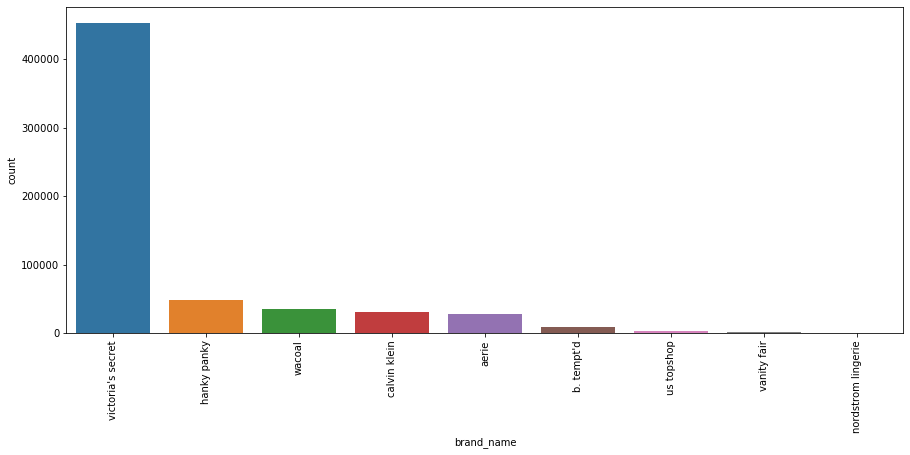

In [90]:
counts = data['brand_name'].value_counts()
#print(counts)
data = data.loc[data['brand_name'].isin(counts.index[counts > 50])]
counts = data['brand_name'].value_counts()
print("")
print(counts)

plt.figure(figsize=(15, 6))
sns.countplot(data=data, x='brand_name', order = data['brand_name'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### 4. Standarize price values

In [10]:
data.dtypes
#Standardize price values used across datasets
import re

colon_to_dollar_conversion_rate = 0.0017
ind_rp_to_dollar_conversion_rate = 0.000066
def deletenumbers(value_str):
    if type(value_str) is str:
        pattern = r'[0-9]'
        value_str= re.sub(pattern, '', value_str) 
        value_str.strip()
            
        return value_str
    else:
        return value_str

def extract_usd_value(value_str):
    if type(value_str) is str:
        value_str= value_str.strip().lower().replace('usd', '').replace('$','').replace("\-.*","").strip()
        value_str = re.sub(r"-.*", "", value_str)
        value_str = re.sub(r"–.*", "", value_str)
        value_str = re.sub(r"\s.*", "", value_str)
        value_str.strip()
        
        if "₡" in value_str:
            value_str = value_str.replace("₡", "").strip()
            value_str = pd.to_numeric(value_str) * colon_to_dollar_conversion_rate            
        elif "rp" in value_str:
            value_str = value_str.replace("rp", "").strip()
            value_str = pd.to_numeric(value_str) * ind_rp_to_dollar_conversion_rate                
            
        return value_str
    else:
        return value_str

In [98]:
data['price'] = data['price'].apply(deletenumbers)
prices = data['price'].unique()
print(prices)

['$. ' '$. - $.' '$ ' '$.–$.' '\xa0$.'
 '\xa0$.\n\t\t\t\t\t            \t\t\t\t\t\t\t\t            \t\t\t\t\t            \t\t\t\n\t\t\t\t\t            \t\t\n\t\t\t\t\t\t            \t\t\t\tNow\xa0$.'
 '₡.' 'Rp.' '. USD']


We saw that 

In [11]:
data['mrp']=data['mrp'].apply(extract_usd_value).apply(pd.to_numeric)
data['price']=data['price'].apply(extract_usd_value).apply(pd.to_numeric)

In [115]:
data.head(3)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,Calvin Klein Women's Sheer Marquisette Demi Un...,36.0,32.4,https://www.amazon.com/-/dp/B01NAVD98J?th=1&psc=1,calvin klein,Bras,Amazon US,"An unlined demi cup bra featuring sheer, sexy ...",4.5,47.0,"[ 72% Nylon, 28% Elastane , Imported , hook an...","30B , 30C , 30D , 30DD , 32A , 32B , 32C , 32D...","30B , 30C , 30D , 30DD , 32B , 32C , 32D , 32D...",Bare
1,Wacoal Embrace Lace Bikini Panty,27.0,27.0,https://www.amazon.com/-/dp/B0011YQFNK?th=1&psc=1,wacoal,Panties,Amazon US,Embrace lace bikini offers great fit and match...,4.4,91.0,"[ 100% Nylon , Imported , Hand Wash , 1.2"" hig...","Small , Medium , Large , X-Large","Small , Medium , X-Large",Large
2,Wacoal Women's Slimline Seamless Minimizer Bra,65.0,65.0,https://www.amazon.com/-/dp/B000T3606Q?th=1&psc=1,wacoal,Bras,Amazon US,Seamless underwire minimizer bra gives great s...,4.3,298.0,"[ Cups: 100% Polyester; Back: 71% Nylon, 29% S...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...",Black


In [69]:
categories = {
    "bra" : ["bra", "push-up", "classic", "tomgirl", "collections", "longline", "bridget", "hannah", "audrey", "lorna jane", "katie", "brooke", "push", "padded", "demi", "scoop", "full coverage", "wireless", "plunge"],
    "panty" : ["panty", "panties", "brief", "hiphugger","cheekies", "thong", "hipster", "cheekster", "short", "bottom", "undies"],
    "bikini" : ["bikini", "triangle", "one-piece", "one piece", "high-neck", "hineck"],
    "top" : ["tee", "top", "tank", "halter", "bandeau", "racerback", "cami", "crop"],
    "lingerie": ["slip", "garter", "babydoll", "lingerie", "teddy", "sleepwear", "fishnet", "robe", "kimono", "bodysuit", "romper", "tunic"],
    "shapewear": ["shapewear", "bustier"],
    "socks" : ["sock"],
    "leggings": ["legging"],
    "bottle": ["bottle"],
    "hoodie" : ["full-zip"],
    "kit" : ["kit", "duffle"],
    "petal": ["petal"]  
}

def standardize_product_category(row):
    product_category = row["product_category"]
    product_name = row["product_name"]
    
    product_name = product_name.lower()
    product_category = product_category.lower()
    for group, items in categories.items():
        for item in items:
            if item in product_category:
                return group

    for group, items in categories.items():
        for item in items:
            if item in product_name:
                return group

    return product_category

data["product_group"] = data.apply(standardize_product_category, axis=1)

bra                   436388
panty                 124268
lingerie               39252
top                     6077
bikini                  5775
shapewear               1019
hoodie                    93
socks                     82
leggings                  66
bottle                    39
baseball hat              27
petal                     22
kit                       18
washed canvas tote         9
Name: product_group, dtype: int64

There are 14 categories! 


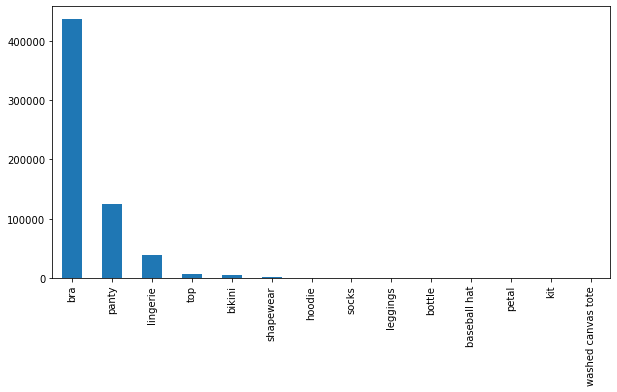

In [70]:
product_group = pd.value_counts(data['product_group'])
display(product_group)
print("There are %d categories! "% (product_group.shape[0]))
product_group.plot.bar(figsize=(10,5))

### 5. Brand analysis

1. How does the pricing differ depending on the brand?

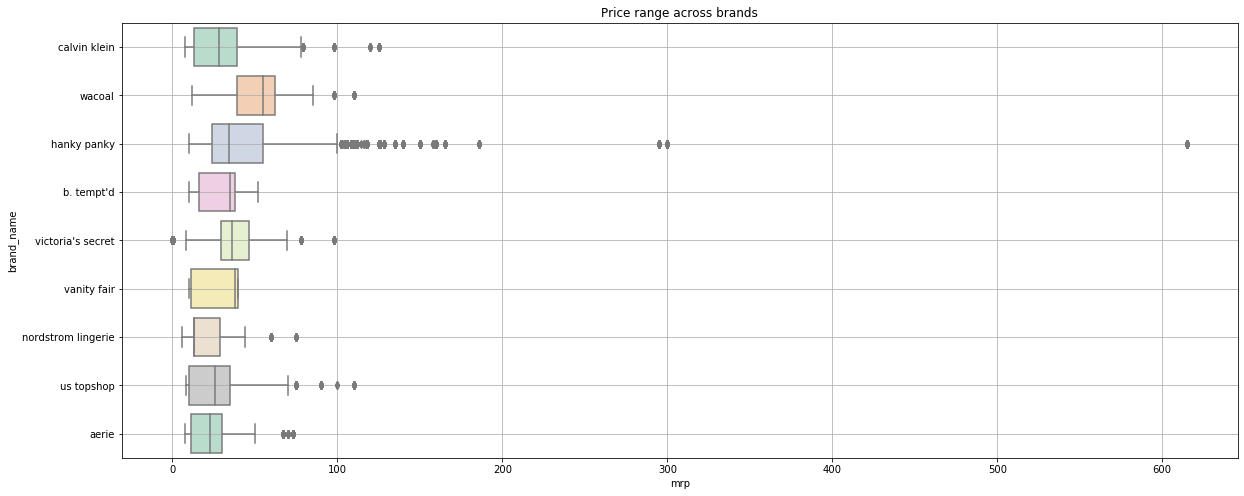

In [14]:
plt.figure(figsize=(20, 8))
sns.boxplot( x=data["mrp"], y=data["brand_name"], palette = "Pastel2").set_title('Price range across brands')
plt.grid()
plt.show()

2. Topic modelling on the product description

3. What are the most common color used by different brands?

In [65]:
colors_first = data.groupby(['brand_name','color'])['color'].agg({'count'})
df_count_first = colors_first.groupby(level=0).agg('idxmax')
df_count_first = colors_first.loc[df_count_first['count']].reset_index()
df_count_first

,brand_name,color,count
0,aerie,True Black,4401
1,b. tempt'd,Night,1610
2,calvin klein,Black,5407
3,hanky panky,Black,6968
4,nordstrom lingerie,Black,158
5,us topshop,BLACK,448
6,vanity fair,Star White,345
7,victoria's secret,Black,17484
8,wacoal,Black,6890


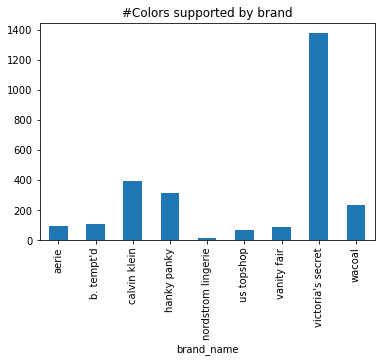

In [44]:
data.groupby(["brand_name"])["color"].nunique().plot.bar(title='#Colors supported by brand')
datacolor = data.groupby(["brand_name"])["color"].unique()

5. Analyses on the product rating

Text(0, 0.5, 'Rating')

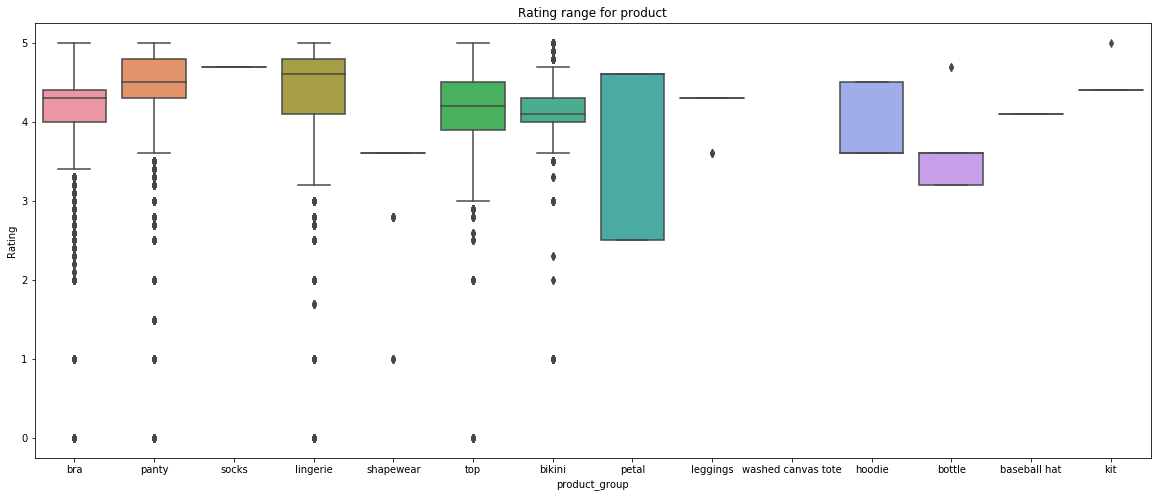

In [79]:
plt.figure(figsize=(20, 8))
plot = sns.boxplot(x='product_group', y='rating', data=data)
plot.set_title("Rating range for product")
plot.set_ylabel('Rating')

6. Common style attributes (wherever applicable)